# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of required parking spaces, among other things. All personally identifying information has from the data. We will perform exploratory data analysis with python to get insight from the data.

# **GitHub Link -**

https://github.com/kunikasoni/EDA-HOTEL_BOOKING

# **Problem Statement**

**Business Problem Overview**

*Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.*

#### **Define Your Business Objective?**

Explore and analyze the data to discover important factors that govern the bookings.



# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [53]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [54]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
#Loading the data set
path = "/content/drive/MyDrive/EDA/hotel_bookings.csv"

In [56]:
my_data = pd.read_csv(path)
# Succesfully loaded

### Dataset First View

In [5]:
# Dataset First Look
my_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns
my_data.shape

(119390, 32)

### Dataset Information

In [7]:
# Dataset Info
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
my_data.duplicated().value_counts()

False    87396
True     31994
dtype: int64

<Axes: ylabel='count'>

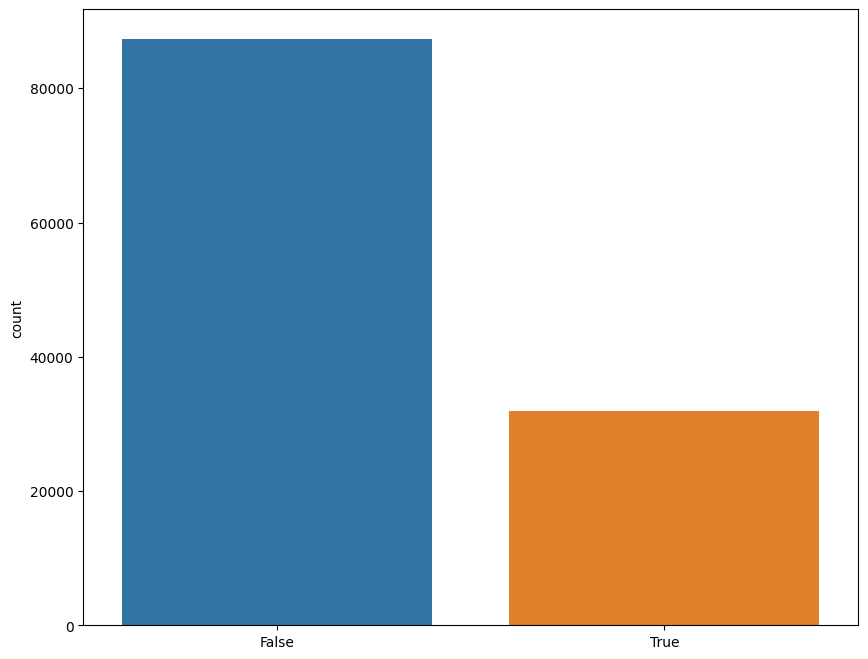

In [9]:
#visulizing duplicate values through Count plot
plt.figure(figsize =(10,8))
sns.countplot(x = my_data.duplicated())

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(my_data.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### What did you know about your dataset?

From the above observations we can see:

1.There are 119390 rows and 32 columns in our dataset.

2.In which 12 are categorical and 20 are numerical.

3.In few columns null value is present so we need to remove that.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
my_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
# Dataset Describe
my_data.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Variables Description

**Hotel H1** = Resort

**Hotel H2** = City Hotel

**is_cancelled** = If the booking was cancelled(1) or
not(0)

**lead_time** = Number of days that elapsed between
the entering date of the booking into the
PMS and the arrival date

**arrival_date_year** =  Year of arrival date

**arrival_date_month** =  Month of arrival date

**arrival_date_week_number** =  Week number for arrival date

**arrival_dat_day** = Day of arrival date

**stays_in_weekend_nights** = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to
stay at the hotel

**stays_in_week_nights** =  Number of week nights (Monday to
Friday) the guest stayed or booked to
stay at the hotel

**adults** =  Number of adults

**children** =  Number of children

**babies** =  Number of babies

**meal** =  Kind of meal opted for

**country** =  Country code

**market_segment** =  Which segment the customer belongs
to

**Distribution _channel** =  How the customer accessed the stay-corporate booking/Direct/TA.TO

**is_repeated_guest** =  Guest coming for first time or not

**previous_cancellation** =  Was there a cancellation before

**previous_bookings** =  Count of previous bookings

**reserved_room_type** =  Type of room reserved

**assigned_room_type** =  Type of room assigned

**booking_changes** =  Count of changes made to booking

**deposit_type** =  Deposit type

**agent** =  Booked through agent

**days_in_waiting_list** =  Number of days in waiting list

**customer_type** =  Type of customer

**required_car_parking** =  If car parking is required

**total_of_special_req** =  Number of additional special requirements

**reservation_status** =  Reservation of status

**reservation_status_date** =  Date of the specific status



### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in my_data.columns.tolist():
  print("No. of unique values in ",i,"is",my_data[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

In [14]:
# checking unique values in categorical columns one by one
# checking unique values in Hotel column
my_data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [15]:
# checking unique values in arrival_date_year column
my_data['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [16]:
# checking unique values in is_canceled column
my_data['is_canceled'].unique()

array([0, 1])

In [17]:
# checking unique values in meal column
my_data['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [18]:
# checking unique values in distribution_channel column
my_data['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [19]:
# checking unique values in children column
my_data['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

##  ***3. Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready

#missing values in columns
my_data.isnull().sum().sort_values(ascending = False)[:6]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

In [21]:
# Replacing null values of company,agent and children with value 0 and country with other
my_data[['company','agent', 'children']] = my_data[['company','agent', 'children']].fillna(0)
my_data[['country']] = my_data[['country']].fillna('other')

In [22]:
#Checking if all null values are removed
my_data.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [23]:
# Checking no of duplicate values in the dataset
len(my_data[my_data.duplicated()])
# thus this dataset contain duplicate values

31994

In [24]:
# droping the duplicate rows
my_data = my_data.drop_duplicates()

In [25]:
# checking the shape of dataset whose combining values of adults ,babies and children columns is 0.
my_data[my_data['adults'] + my_data['babies'] + my_data['children'] == 0].shape

(166, 32)

In [26]:
my_data.shape

(87396, 32)

In [27]:
# droping the rows where combining values of adults,babies and children is 0 because that simply means no bookings were made
my_data.drop(my_data[my_data['adults'] + my_data['babies'] + my_data['children'] == 0].index, inplace = True )

### <b>Adding important columns.<b>

In [28]:
# Adding total staying days in hotels
my_data['total_stay'] = my_data['stays_in_weekend_nights'] + my_data['stays_in_week_nights']

In [29]:
# Adding total people num as column,i.e. total types of person = num of adults + children + babies
my_data['total_people'] = my_data['adults'] + my_data['children'] + my_data['babies']

In [30]:
my_data.shape

(87230, 34)

### What all manipulations have you done and insights you found?

#### We have done the following maipulation and the insights found by us are as follows :-
* We found that there were four columns containing null values So we had null values in columns - Company, agent, Country and Children.

 1.So,for company and agent We have filled the missing values with 0 value.

 2.for country,We have fill missing values with object 'other' (assuming while collecting data country was not found so user selected the 'other' option.)

 3.As the count of missing values in Children Column was only 4,so it was replaced with 0 considering no children.

* This dataset was also contaning duplicate values so duplicate values was dropped.

* We found that there were some rows in which the combining values of adult,babies and children was 0 so this simply means there were no guests as 0 indicates presence of none.So,there were no bookings made.So as a result,We dropped the rows where combining values of adults,babies and children columns was 0.
* There were two new columns that was added,one is 'total_stay' and other is 'total_people'


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart for most preferred hotel

In [31]:
#Most booking hotel
my_data['hotel'].value_counts()

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

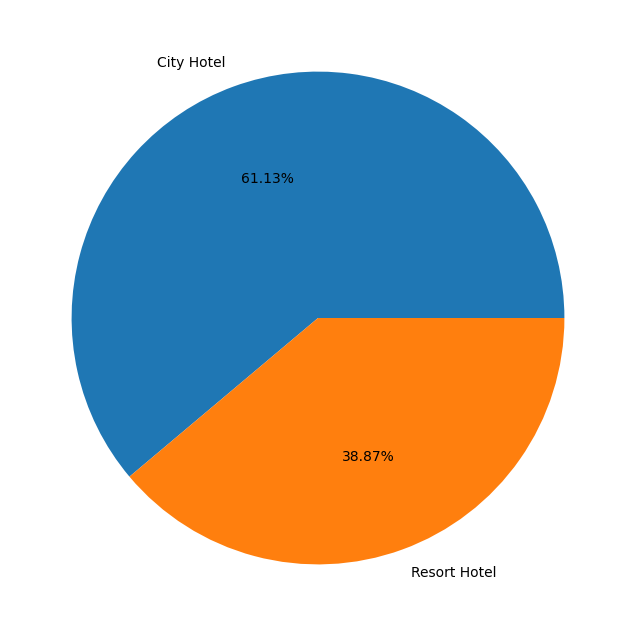

In [32]:
# Lets plot it for better understanding.
hotels = ['City Hotel','Resort Hotel']
data = [ 53428, 33968]
# creating plot
fig = plt.figure(figsize = (10,8))
plt.pie(data, labels = hotels, autopct='%1.2f%%')
plt.show()

From the above chart We got to know that City Hotel is most preffered hotel by guests.Thus city hotels has maximum bookings 61.13% guests preffered city hotel while only 38.87% guests have shown interest in resort hotel.

#### Chart - 2 - Hotel type with highest adr.

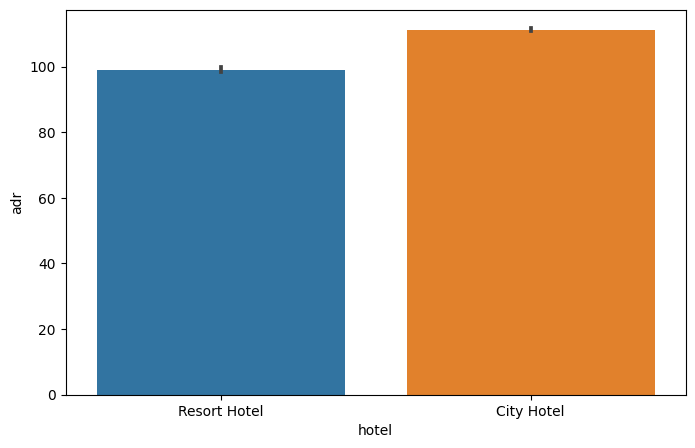

In [33]:
# chart-2- visualization code
plt.figure(figsize = (8,5)) # no-8
sns.barplot(x=my_data["hotel"], y=my_data["adr"])
plt.show()

City Hotel has highest ADR. This means city hotels are generating more revenue than the resort hotel. More the ADR more will be revenue.

#### Chart - 3 - Percentage of repeated guests.

Text(0.5, 1.0, 'Percentage (%) of repeated guests')

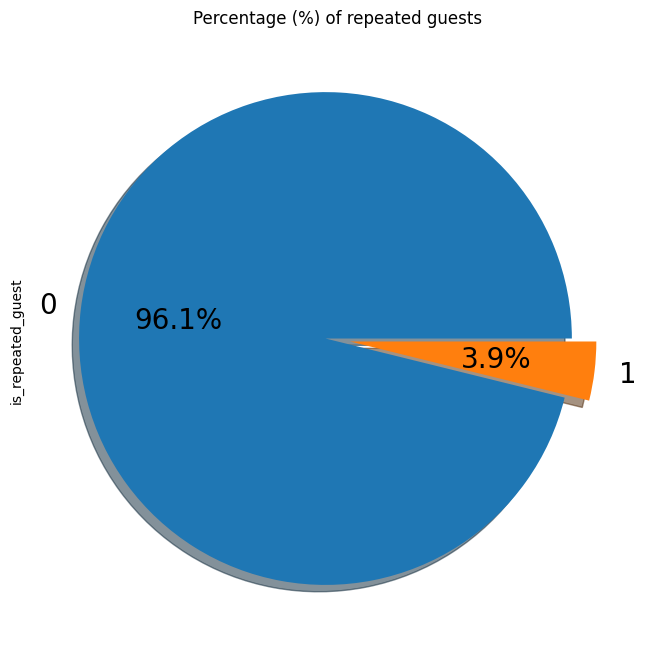

In [34]:
# chart -3 visualization code
my_data['is_repeated_guest'].value_counts().plot.pie (explode = (0.05,0.05),autopct = '%1.1f%%',shadow = True,figsize=(12,8),fontsize=20)

plt.title("Percentage (%) of repeated guests",fontsize = 12)

Here 0 is not repeated guests and 1 is repeated guests.
Repeated guests arre very few which only 3.9% while 96.1% guests are not returning to the same hotel So it's a matter of deep thinking and looking proper steps to increase the repeated guests numbers.In order to retained the guests management should take feedbacks from guests and try to improve the service.

#### Chart - 4 - Meal type distribution.

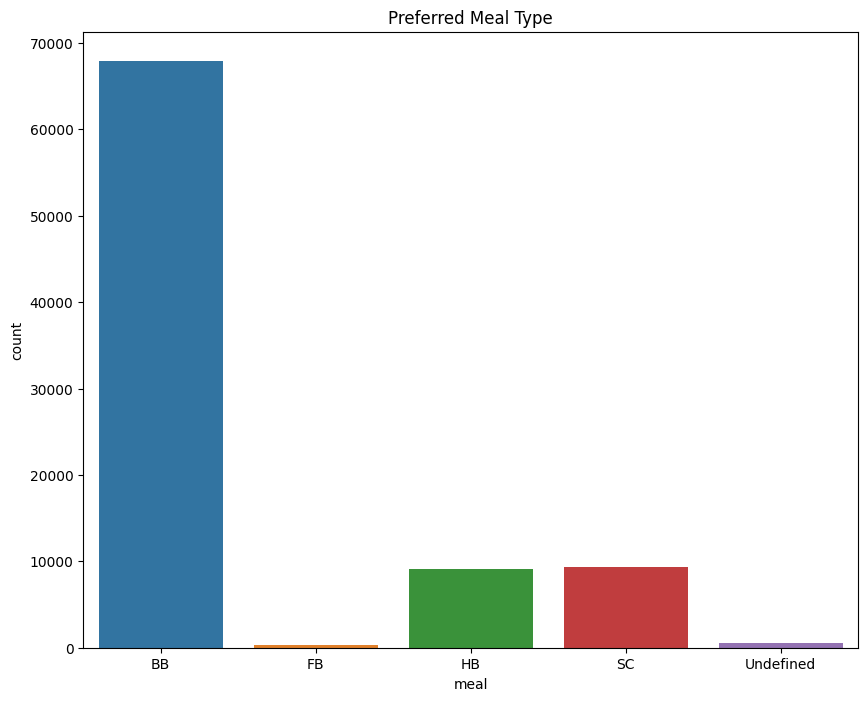

In [35]:
# chart-4 visualization code
plt.figure( figsize=(10, 8)) # no-7
sns.countplot(x = my_data["meal"])
plt.title('Preferred Meal Type')
plt.show()

The insights that We have found from the above graph is that the most preferred meal type by the guests is BB(bed and breakfast) while HB-(Half Board) and SC(Self Catering) are equally prefered.Types of meal in hotels are as follows:-

BB-( Bed and Breakfast), HB -(Half Board), FB-( Full Board) and SC - (Self Catering)

#### Chart - 5 - Bookings by month .

In [36]:
#chart 5 visualization code
# using group by on arrival_date_month and taking the hotel count
bookings_by_months_df = my_data.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})

#create list of month in order
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

#creating df which will map the order of above months lust without changing its values.
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)

#sorting by arrival_date_month
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of bookings')

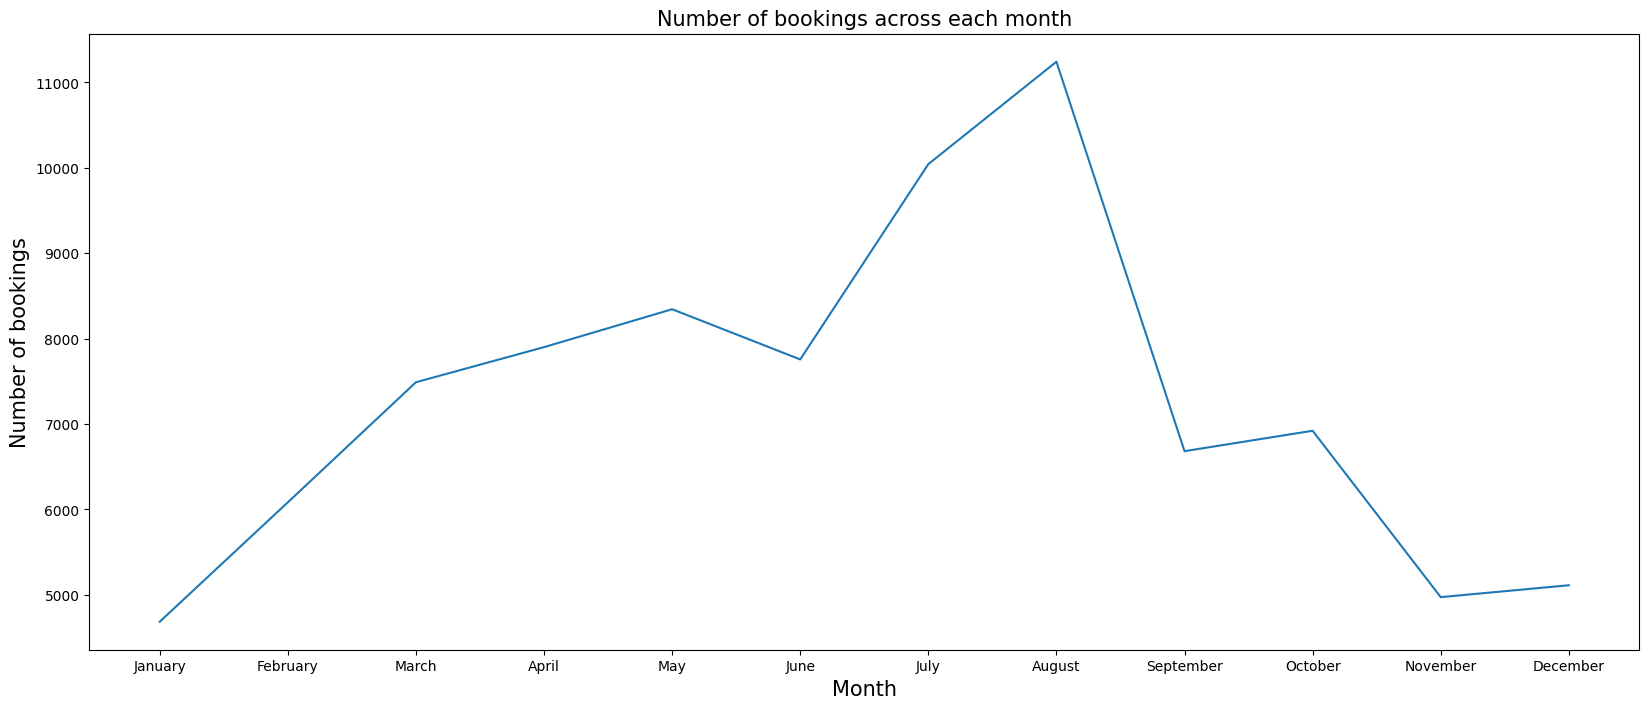

In [37]:
# set plot size
plt.figure(figsize=(20,8))

#plotting lineplot on x- months & y - booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month',fontsize = 15)

#set x lable
plt.xlabel('Month',fontsize=15)

#set y lable
plt.ylabel('Number of bookings',fontsize=15)

From the above chart we have found that july and August months had the most bookings As. july and august surrounds in  near the summer vacation. So Summer vaccation can be the reason for the bookings.

#### Chart - 6 -  Optimal Stay length in hotels.


In [38]:
# using groupby function on total stay and hotel
stay = my_data.groupby(['total_stay','hotel']).agg('count').reset_index()
# taking only first three columns
stay = stay.iloc[:,:3]
# Renaming the columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})

Text(0.5, 0, 'total_stay(days)')

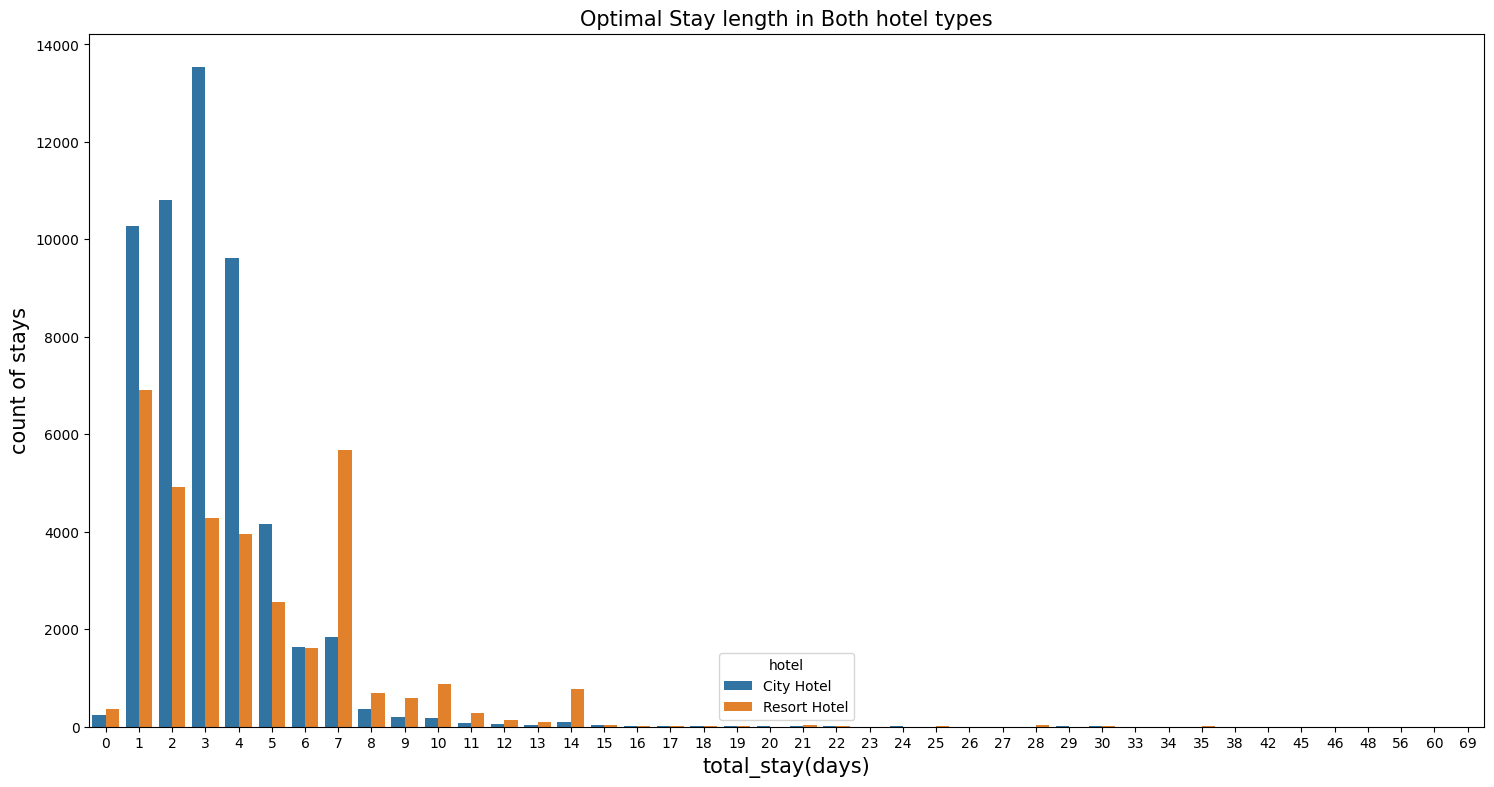

In [39]:
# setting plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data = stay)

# set labels
plt.title('Optimal Stay length in Both hotel types',fontsize=15)
plt.ylabel('count of stays',fontsize=15)
plt.xlabel('total_stay(days)',fontsize=15)

From the above observations,We have found that the Optimal stay in both the type hotel is less than 7 days SO,after that staying numbers have declined drastically.

#### Chart - 7 - Plotting Histrogram

<function matplotlib.pyplot.show(close=None, block=None)>

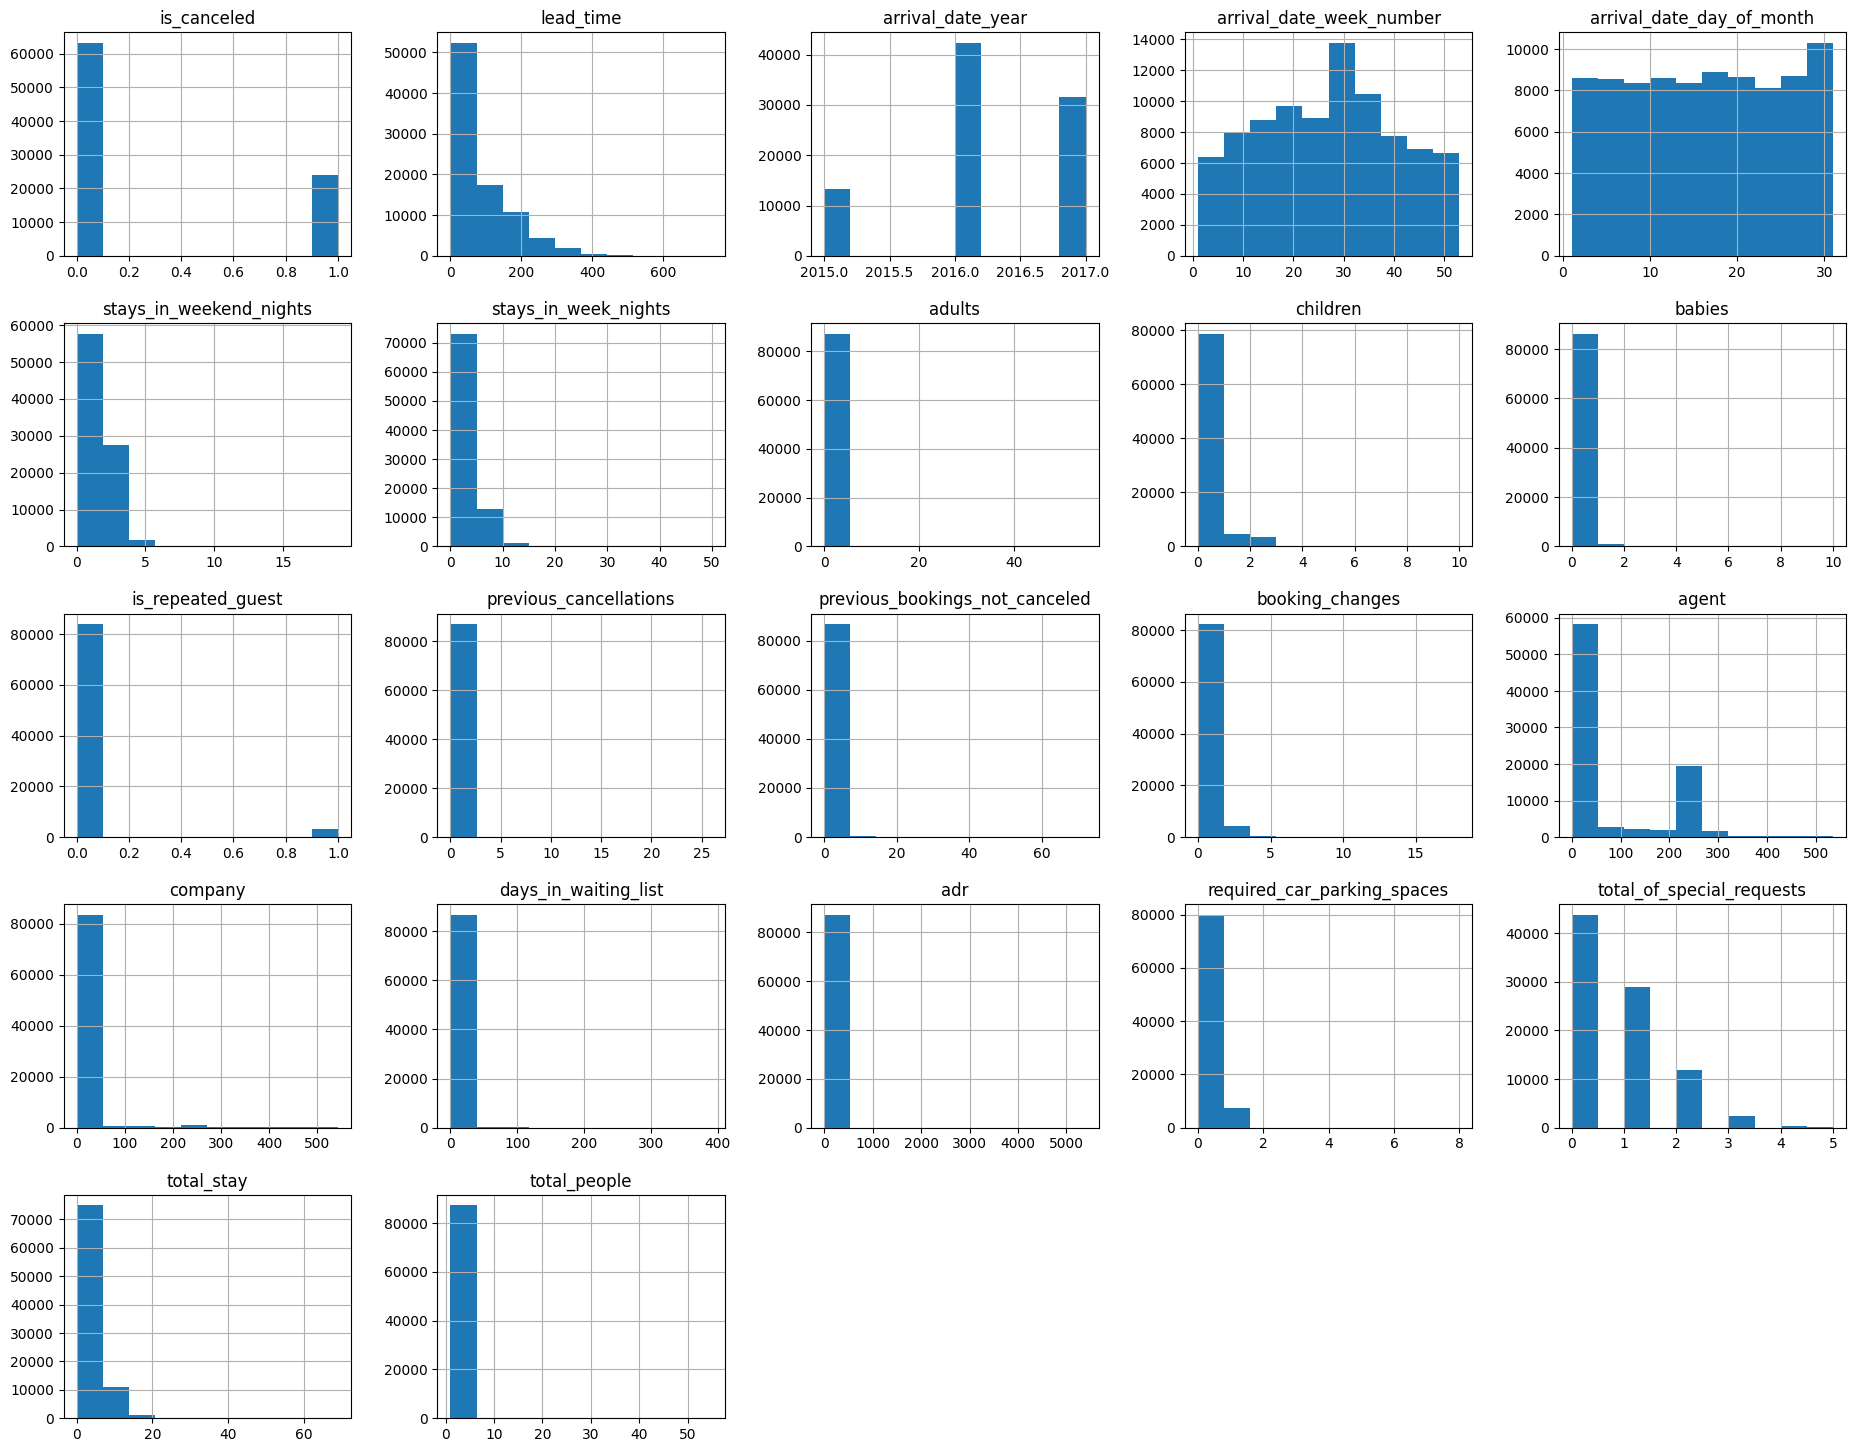

In [40]:
 # Chart -7 visualization code
 my_data.hist(figsize=(23,18))
 plt.show

Some insights found from the chart are as follows:-

* We can see that the maximum guest came in the year 2016.
* Maximum arrival week number is 30.
* Maximum arrival happens in the last of the month.
* Maximum guests comes with no children.
* There is very less requirement of Car parking spaces.



Just a histrogram cannot define business impact.It's done just to see the distribution of the column data over the dataset.

#### Chart - 8 - Room type preference

Text(0.5, 1.0, 'Most preferred Room type')

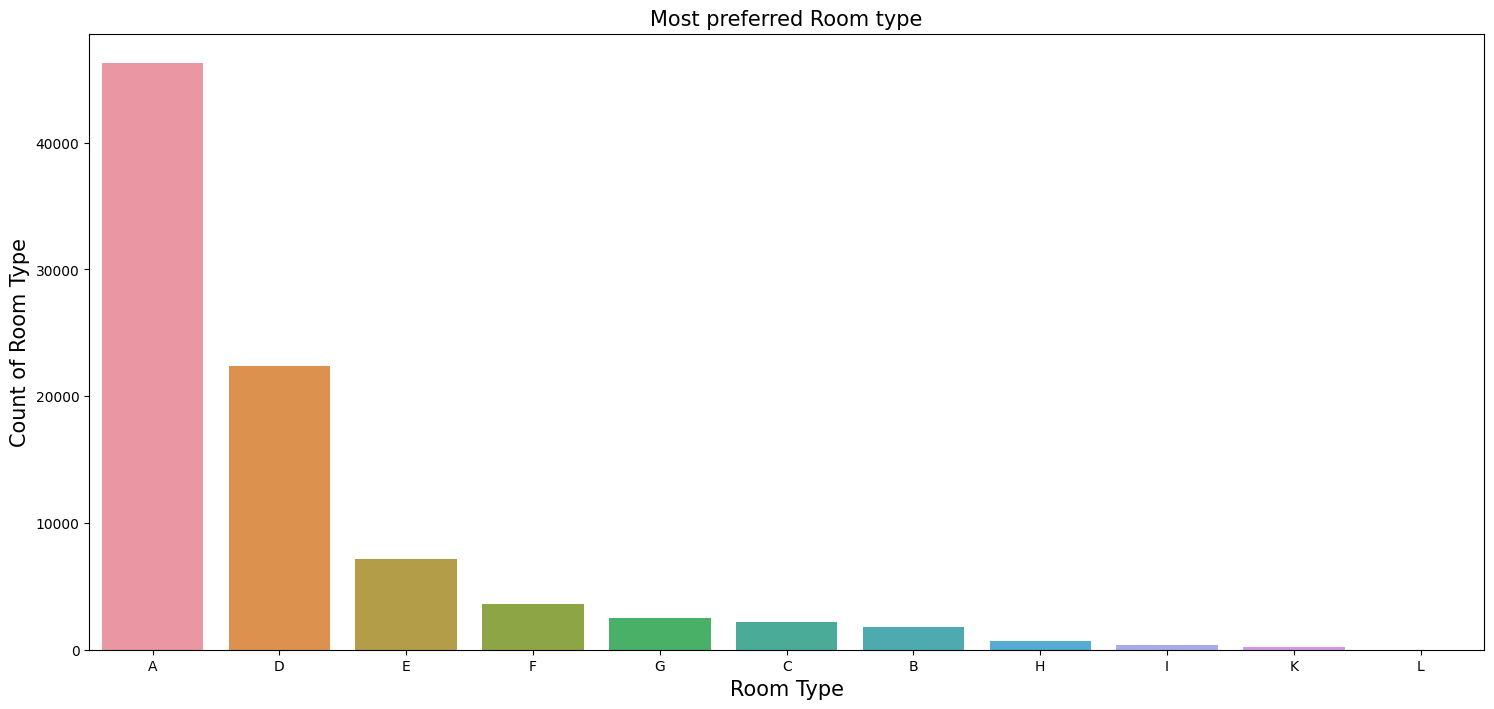

In [41]:
# chart - 8 visuallization code
# set plotsize
plt.figure(figsize=(18,8))

#plotting
sns.countplot(x=my_data['assigned_room_type'],order=my_data['assigned_room_type'].value_counts().index)

# set xlabel for the plot
plt.xlabel('Room Type',fontsize=15)

# set y label for the plot
plt.ylabel('Count of Room Type',fontsize=15)

# set title for the plot
plt.title("Most preferred Room type",fontsize=15)

From the above chart,it is found that the most preferred Room type is "A" So majority of the guests have shown interest in this room type.This cart shows room type 'A' is most prefered by guests.

####Chart - 9 - Customer types

Text(0, 0.5, 'Number of customer')

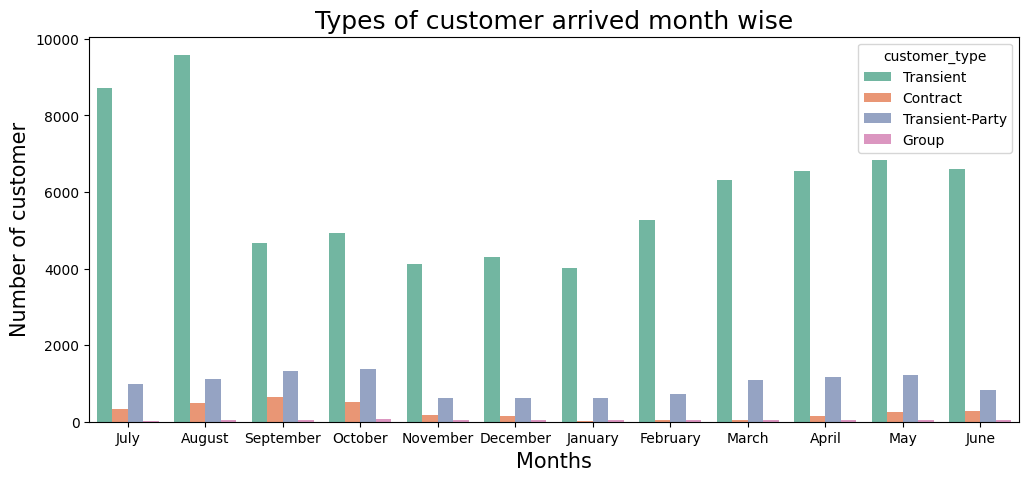

In [42]:
# chart -9 - visualization code
# set plotsize
plt.figure(figsize=(12,5))

#plotting
sns.countplot(x='arrival_date_month',hue = 'customer_type',palette= "Set2",data=my_data)
plt.title("Types of customer arrived month wise",fontsize=18)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of customer',fontsize=15)


From the above graph it can be summarised that the Transient type of customers visit the most whereas the visitors who are in group comes in the category of least visitors.





####Chart - 10 - Correlation Heatmap

Text(0.5, 1.0, 'Co-relation of the columns')

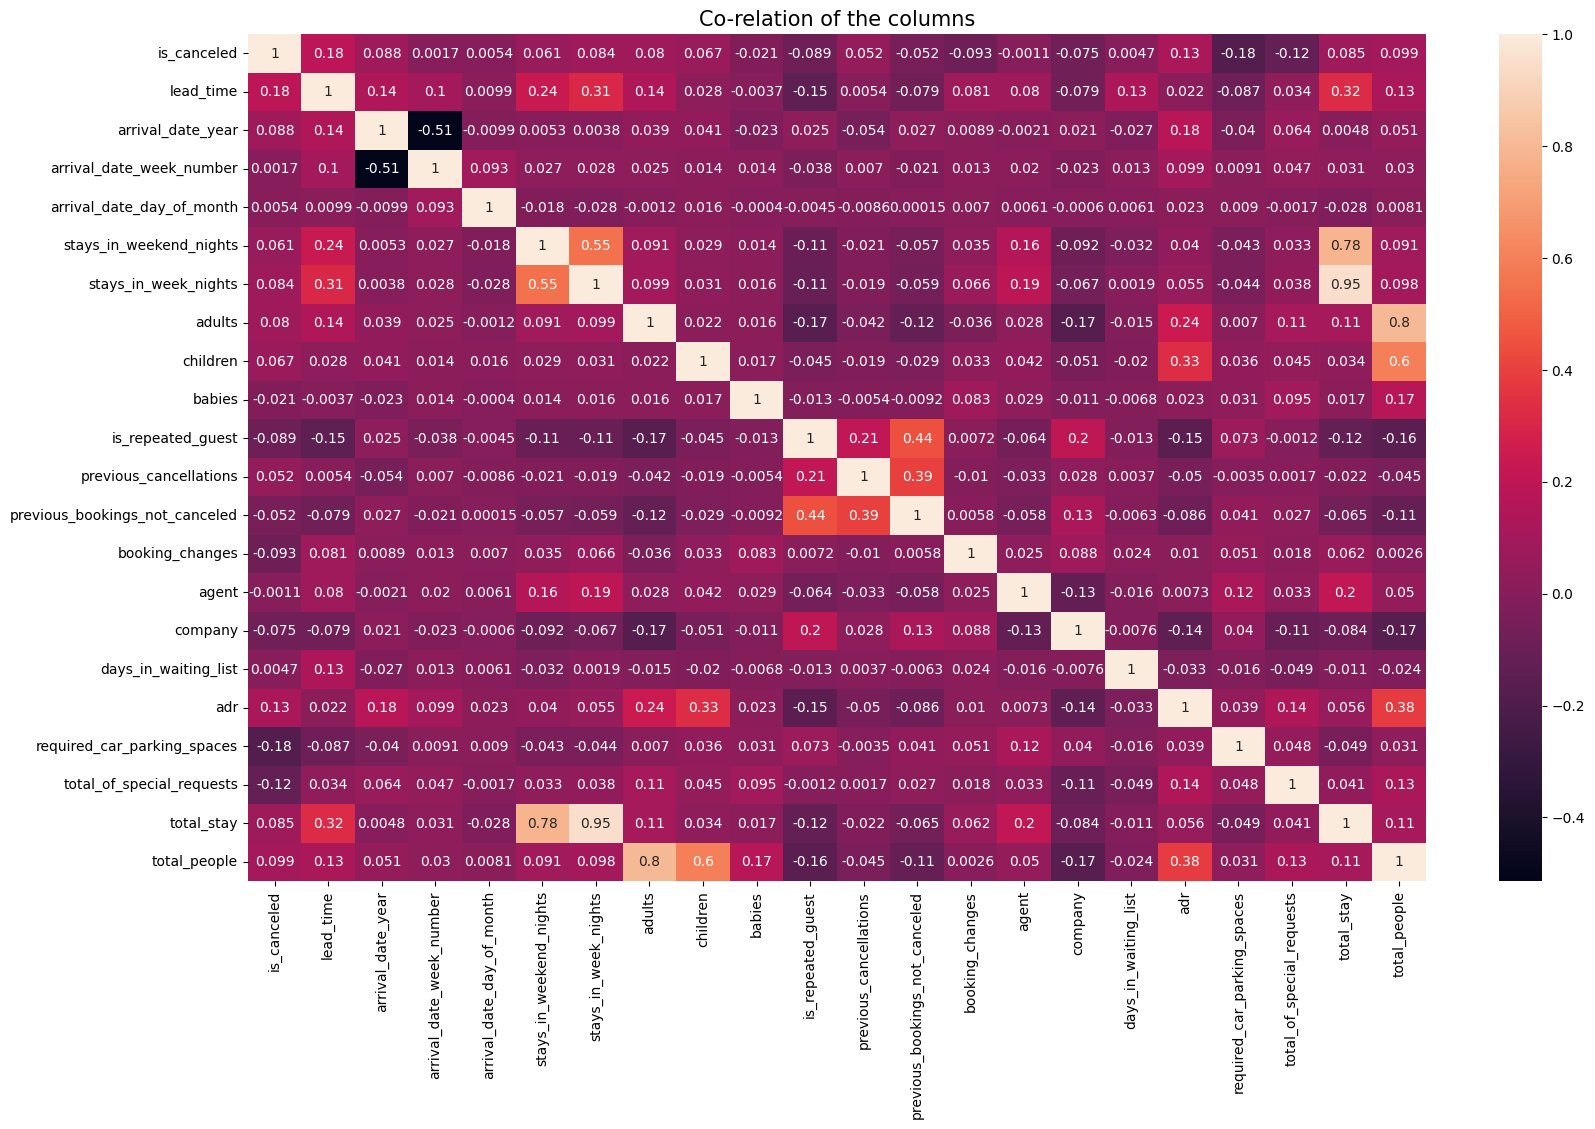

In [43]:
# correlation Heatmap visualization code
plt.figure(figsize= (19,11))
sns.heatmap(my_data.corr(),annot=True)
plt.title('Co-relation of the columns', fontsize=15)


The insights found from the above chart are as follows:-

* is_canceled and total_stay are negatively correlated. This means customers are unlikely to cancel their bookings if they don't get the same room as per reserved room. We have visualized it above.
* lead_time and total_stay is positively corelated.This means more the stay of customer is,more will be the lead time.
*adults,children and babies are corelated to each other.This indicates more the people,more will be adr.
* is_repeated guest and previous bookings not canceled have a strong corelation.This may be due to the reason that repeated guests are not more interested to cancel their bookings.
* So these are some powerful insights found from the chart of corelation heatmap.


####Chart - 11 - Year and Hotel wise confirmed bookings and cancellation distribution.

Text(0.5, 0, 'hotel')

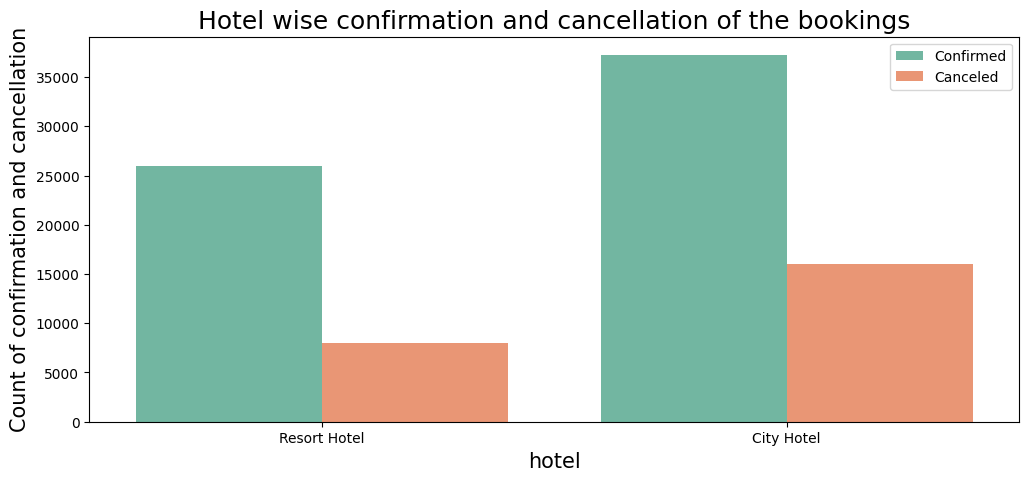

In [44]:
# plotting a count plot chart using seaborn for counts of confirmed and canceled bookings.
plt.figure(figsize=(12,5))
sns.countplot(x='hotel',hue = 'is_canceled',palette= "Set2",data=my_data)
plt.legend(['Confirmed','Canceled'])
plt.title("Hotel wise confirmation and cancellation of the bookings", fontsize = 18)
plt.ylabel("Count of confirmation and cancellation",fontsize = 15)
plt.xlabel("hotel",fontsize = 15)

We can clearly deduce from the above graphs that the City hotel is having greater number of bookings as compared to Resort hotel.But the cancellation percentage is high of the City hotel.

Text(0.5, 0, 'Year')

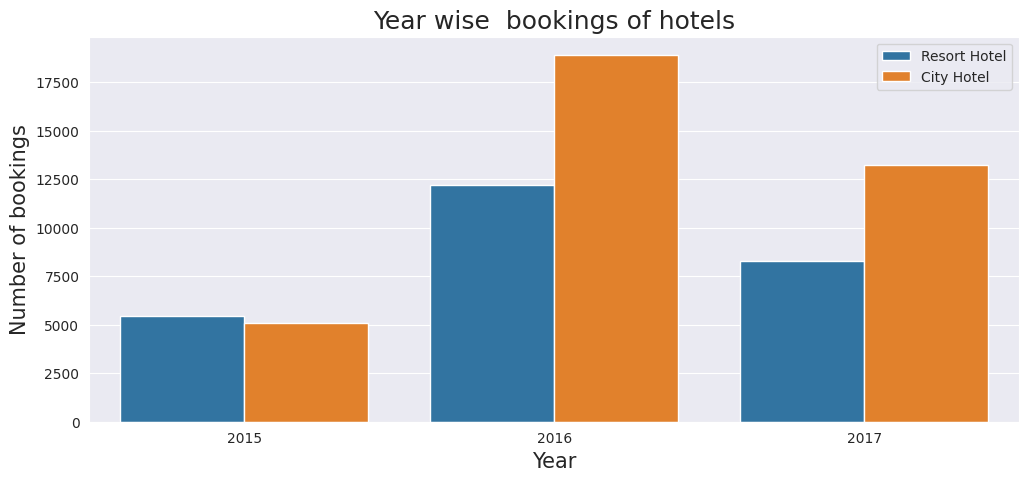

In [45]:
# Removing the cancelled bookings from the data and creating a new dataframe
data_not_canceled = my_data[my_data['is_canceled']==0]

# year wise bookings of hotels
sns.set_style(style='darkgrid')
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_year',hue = 'hotel',palette= "tab10",data=data_not_canceled)
plt.legend(['Resort Hotel','City Hotel'])
plt.title("Year wise  bookings of hotels", fontsize = 18)
plt.ylabel("Number of bookings",fontsize = 15)
plt.xlabel("Year",fontsize = 15)



From the above graphs.it can be summarized that in the year 2016 both the hotel saw a massive  increase in their bookings and by far the year 2016 is the year of the highest bookings of both hotel. in each year that is 2015,2016 anad 2017 the city hotel is having the highest number of bookings.

####Chart - 12 - percentage distribution of required_car_parking_spaces.

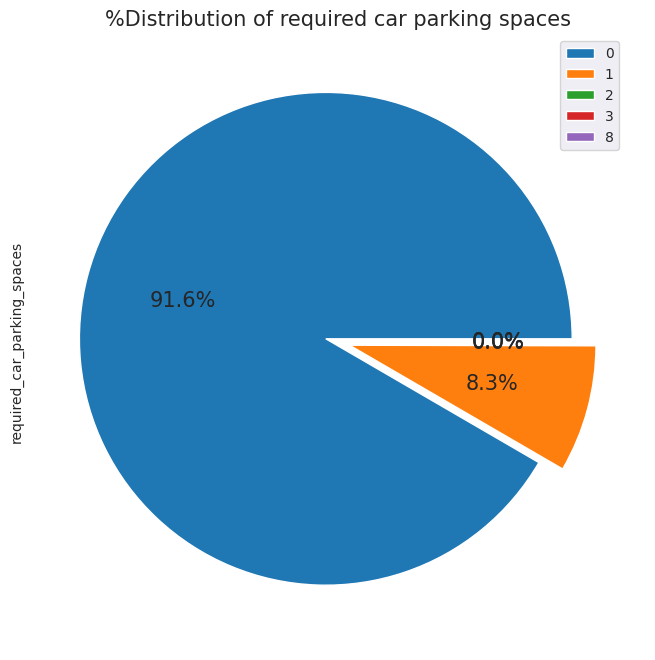

In [46]:
# chart-11- visuallization code
my_data['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=my_data['required_car_parking_spaces'].value_counts().index
plt.title('%Distribution of required car parking spaces',fontsize=15)
plt.legend(bbox_to_anchor=(0.85,1), loc= 'upper left',labels = labels)

This chart shows that 91.6% guests did not required the parking space.only 8.3% guests required only 1 parking space.

#**Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Business objective attained as follows:

* To attain high growth and more success,hotel business need to flourish and for that few things which we need to consider is high revenue generation,customers satisfaction and employeee retention.

* We are able to achieve the same by showing the client which are the months which are high in revenue generation by using various charts and graphs distribution.

* Enhancing the revenue adopted by bar chart distribution of which type room are most preffered and reserved and which are the months suitable for visitors.

* we also have founded the varouses preferences in different categories like most liked meal type,optimal stay length,facillities required by customers like car parking spaces,etc.so all these insights ultimately add to have a better planning for growth and higher revenue.

* So preparing well by using and understanding these useful outcomes,the client can be well prepareed in advance so that minimum grievances would be faced by clients in long run and would help in further enhacement of their hospirality and service.

* Ask for feedback often from the guests visiting the hotels so that the quality can be upgraded to the next level to increase more guests.

* Periodically throw offers to attract the old customers so as to increase the no of repeated guests.

# **Conclusion**

* City hotels are the most preferred hotel type by the guests.So we can say that City hotels are the busiest hotel in comparision to the resort hotel.
* The average ADR of city hotels is higher as compared to the resort hotels.So,it can be said that these City hotels are generating more revenue than the resort hotels.
* The total stay of guests is directly proportional to the adr.So higher the days of stay ,the higher will be adr and revenue as well.
*The percentage of repeated guests is very low.Only 3.9% people had revisited the hotels.Rest 96.1% were new guests.So retention rate is much low.
*The percentage of required car parking spaces is very low.This means less car parking spaces don't affect the business much.
*Among different types of meals,BB is most preferred type of meal by the guests.So Guests loved to opt for this meal type.
*Most number of bookings have taken place in the month of July and August.july and August are the favourite months of guests to visit different places.
*Majority of the guests have shown interest in the room type 'A'.

### ***Thank You***